In [2]:
import numpy as np
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

In [3]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

/home/tlo/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [34]:
#Create registers
qr=qk.QuantumRegister(1,'q')
cr=qk.ClassicalRegister(1,'c')
qc=qk.QuantumCircuit(qr,cr)

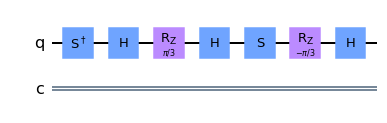

In [35]:
#Prepare the state
theta = pi/3 #This value is assumed known
phi = pi/3 #we want to measure this
#set theta
qc.sdg(0)
qc.h(0)
qc.rz(theta,0)
qc.h(0)
qc.s(0)

qc.rz(-phi,0) #Note, the angle needs to negative to rotete in the correct direction
qc.h(0)

qc.draw('mpl')

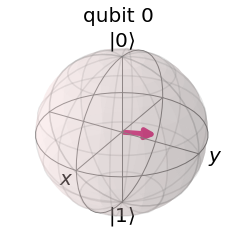

In [36]:
#See how the initial state looks like
backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

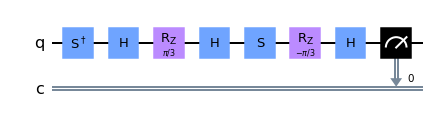

In [37]:
#Measure
measureZ = qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ = qc + measureZ

testZ.draw('mpl')

In [38]:
#send to IBM
backend = my_provider.get_backend('ibmq_qasm_simulator')
jobIBM = qk.execute([testZ],backend=backend,shots=1024)
res = jobIBM.result()

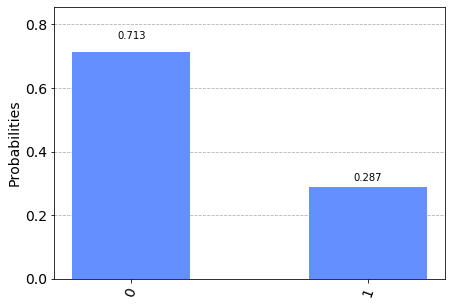

In [39]:
plot_histogram(res.get_counts(testZ))

In [40]:
counts = res.get_counts(testZ)
print(counts['0'])
prob_0 = counts['0']/1024
np.arccos((2*prob_0-1)/np.sin(theta*2))

730


1.056812945730373

In [41]:
#Check the result
phi

1.0471975511965976

In [42]:
#Let's compare this to U3 provided by qiskit
#Create registers
qr2=qk.QuantumRegister(1,'q')
cr2=qk.ClassicalRegister(1,'c')
qc2=qk.QuantumCircuit(qr,cr)

#Use the U3 operator
qc2.u(theta,phi,0,0)

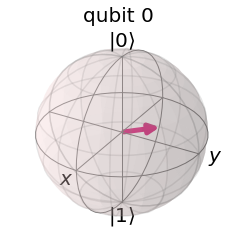

In [43]:
#See how the initial state looks like
backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc2,backend).result().get_statevector()
plot_bloch_multivector(out)

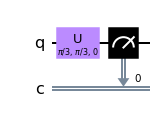

In [45]:
#Measure
measureZ2 = qk.QuantumCircuit(qr2,cr2)
measureZ2.measure(qr2,cr2)
testZ2 = qc2 + measureZ2

testZ2.draw('mpl')

In [46]:
#send to IBM
backend = my_provider.get_backend('ibmq_qasm_simulator')
jobIBM2 = qk.execute([testZ2],backend=backend,shots=1024)
res2 = jobIBM2.result()

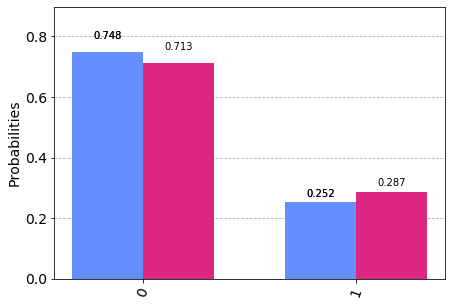

In [50]:
plot_histogram([res2.get_counts(testZ2), res.get_counts(testZ)])

In [53]:
#Phi angle set by U3 operator
counts2 = res2.get_counts(testZ2)
print(counts2['0'])
prob_02 = counts2['0']/1024
np.arccos((2*prob_02-1)/np.sin(theta*2))

766


0.9608301700547219

In [54]:
pi/3

1.0471975511965976

In [55]:
#phi angle set by my set of operations
np.arccos((2*prob_0-1)/np.sin(theta*2))

1.056812945730373